<a href="https://colab.research.google.com/github/shrey10926/SPEARLINE/blob/main/SA_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT THE FILE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df1 = df.copy(deep = True)
test_df1 = test_df.copy(deep = True)

# DROPPING THESE 2 COLUMN AS THEY DONT PLAY A ROLE IN PREDICTION
df1.drop(['company_id', 'date'], axis = 1, inplace = True)
test_df1.drop(['company_id', 'date'], axis = 1, inplace = True)

EDA

In [2]:
pd.set_option('display.float_format', lambda x: '%3f' %x)
pd.set_option('display.max_columns', 30)


# GET BASIC INFO ABOUT THE DATA
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98739 entries, 0 to 98738
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_type             98739 non-null  object 
 1   avg_pesq_score           98739 non-null  float64
 2   quality_too_poor         98739 non-null  int64  
 3   number_busy              98739 non-null  int64  
 4   temporarily_unable_test  98739 non-null  int64  
 5   outage_sec               98739 non-null  float64
 6   number_test_types        98739 non-null  int64  
 7   numbers_tested           98739 non-null  int64  
 8   followup_tests           98739 non-null  int64  
 9   min_commit               49897 non-null  float64
 10  has_min_commit           98739 non-null  int64  
 11  volume_tests             98739 non-null  int64  
 12  is_testing               98739 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 9.8+ MB


,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
count,98739.000000,98739.000000,98739.000000,98739.000000,98739.000000,98739.000000,98739.000000,98739.000000,49897.000000,98739.000000,98739.000000,98739.000000
mean,1.646096,1.160777,12.449792,1.246427,579.964905,0.895755,66.316319,2.789830,16367.684370,0.504735,698.954587,0.626520
std,1.901872,9.725059,65.360308,16.368124,1848.339796,1.079343,323.045161,26.715373,59488.144476,0.499980,4132.414286,0.483730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,24.000000,1.000000
75%,3.810000,0.000000,2.000000,0.000000,192.000000,2.000000,32.000000,0.000000,7200.000000,1.000000,192.000000,1.000000
max,4.500000,627.000000,4492.000000,1258.000000,23831.720000,6.000000,4868.000000,2337.000000,400000.000000,1.000000,57105.000000,1.000000


In [3]:
# THERE ARE A LARGE NUMBER OF DUPLICATES PRESENT IN THE DATA 

duplicate = df1[df1.duplicated()]
df1.drop_duplicates(keep = 'first', inplace = True)

In [4]:
# EDA 

# FROM THE BELOW ANALYSIS WE CAN SEE THAT MIN_COMMIT HAS 33% NAN VALS.
def missing_vals(data3):     
    nan_feat = [cname for cname in data3.columns if data3[cname].isnull().sum() >= 1]
            
    # TO FIND OUT THE % OF NAN 
    for i in nan_feat:
        print(i, np.round(data3[i].isnull().mean(), 2))          

missing_vals(df1)

min_commit 0.33


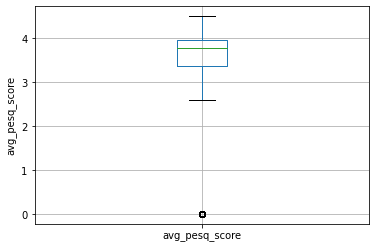

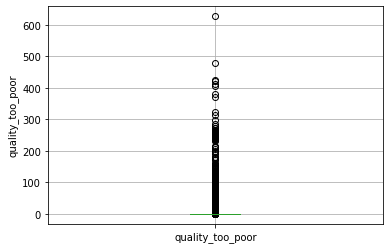

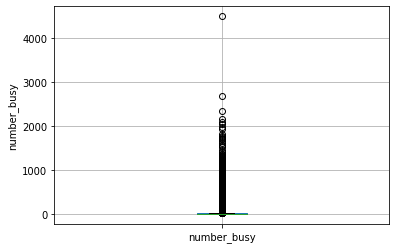

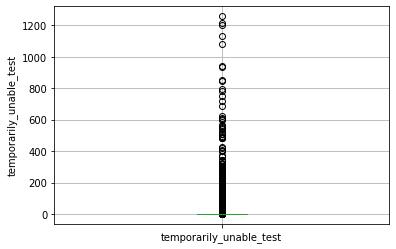

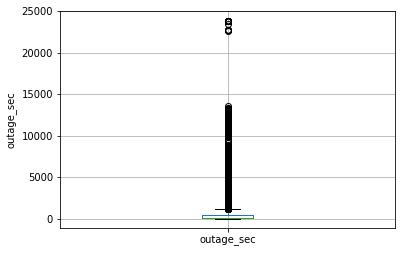

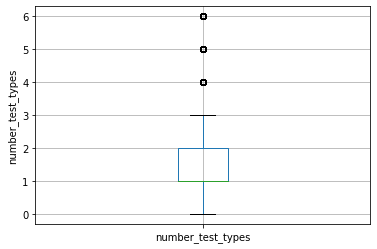

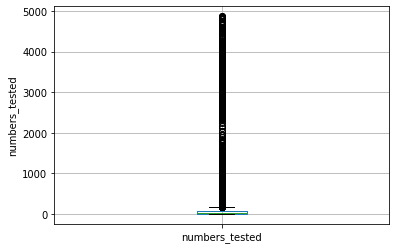

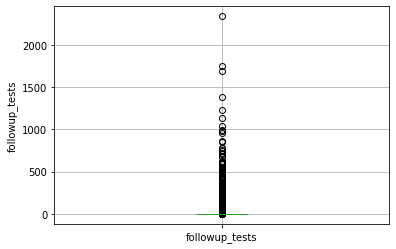

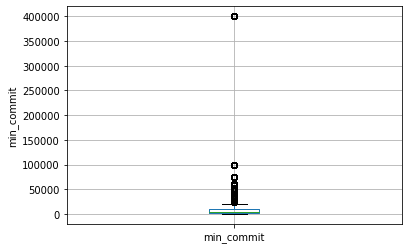

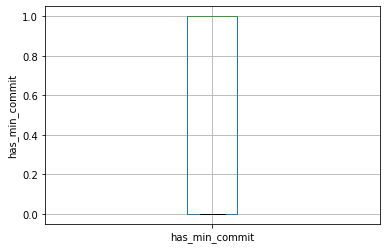

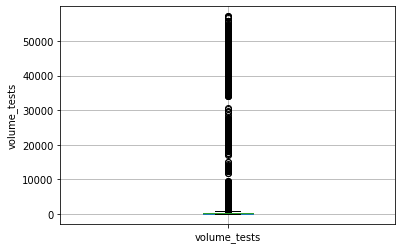

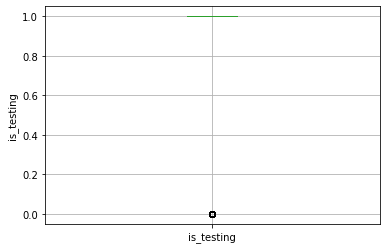

In [5]:
# OUTLIERS 
# A MAJORITY OF THE FEATURES HAVE OUTLIERS

num_feat = [cname for cname in df1.columns if df1[cname].dtype in ['int64', 'float64']]

for i in num_feat:
    df1.boxplot(column = i)
    plt.ylabel(i)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


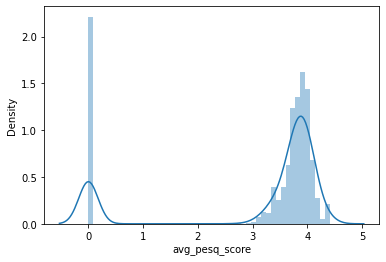

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


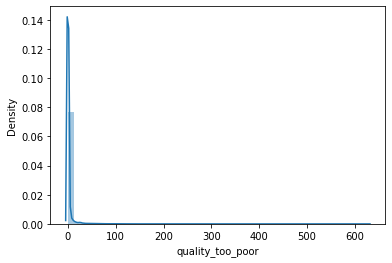

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


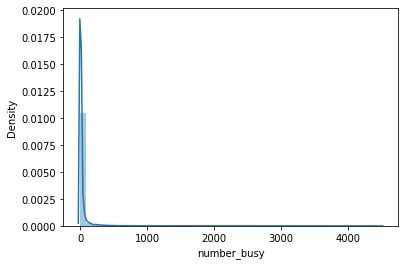

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


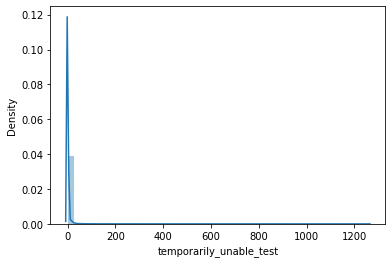

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


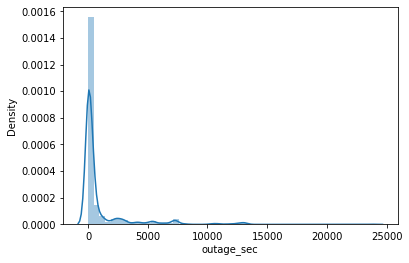

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


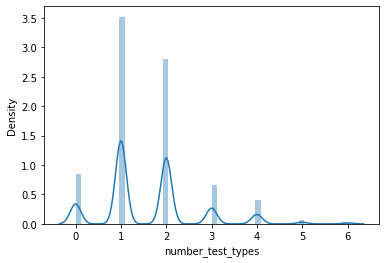

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


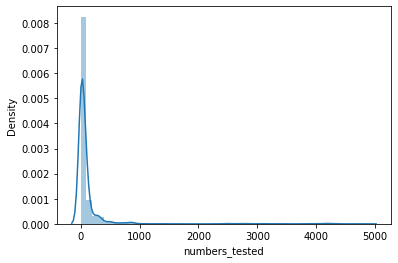

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


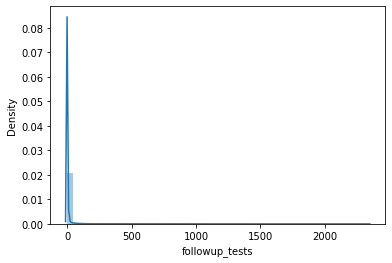

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


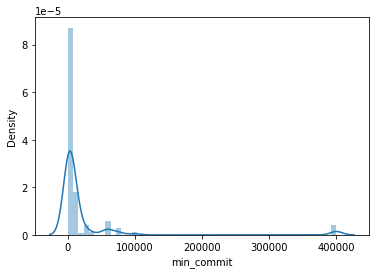

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


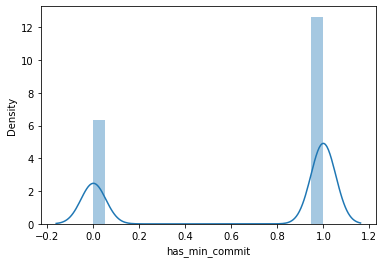

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


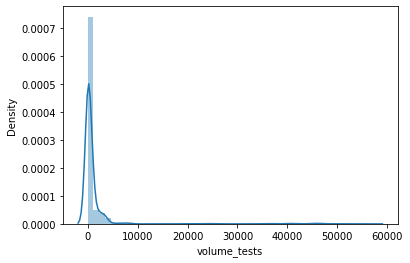

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


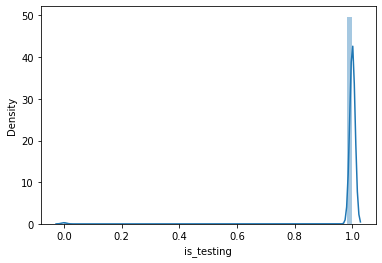

In [6]:
# DISTRIBUTION OF FEATURES
# A MAJORITY OF THE FEATURES INCLUDING THE TARGET ARE RIGHT SKEWED

for j in num_feat:
    sns.distplot(df1[j])
    #plt.ylabel(j)
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


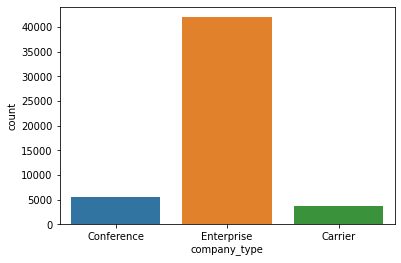

In [7]:
sns.countplot(df1['company_type'])

PREPROCESSING

In [8]:
!pip install category-encoders
from sklearn.model_selection import train_test_split, ParameterGrid, cross_validate, KFold, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
import category_encoders as ce
from sklearn.ensemble import ExtraTreesRegressor

     |████████████████████████████████| 82 kB 363 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
x = df1.drop(['volume_tests'], axis = 1)
y = df1['volume_tests']



In [10]:
# HERE WE SEPARATE THE NUMERICAL AND CATEGORICAL FEATURES AS WE NEED TO FEED ONLY NUMERICAL FEATURES TO THE IMPUTER
def split_data(ip,op):
    
    train_x, test_x, train_y, test_y = train_test_split(ip, op, test_size = 0.2, random_state = 69)

    
    train_cat_data = train_x.select_dtypes(include = 'object')
    train_cat_data = train_cat_data.reset_index(drop = True)
    train_num_data = train_x.select_dtypes(include = 'number')
    train_num_data = train_num_data.reset_index(drop = True)
    
    test_cat_data = test_x.select_dtypes(include = 'object')
    test_cat_data = test_cat_data.reset_index(drop = True)
    test_num_data = test_x.select_dtypes(include = 'number')
    test_num_data = test_num_data.reset_index(drop = True)
    
    return train_y, test_y, train_num_data, train_cat_data, test_num_data, test_cat_data

train_y, test_y, train_num_data, train_cat_data, test_num_data, test_cat_data = split_data(x,y)


In [11]:
# OUT OF TESTED IMPUTATION TECHNIQUES, ITERATIVE IMPUTER GAVE THE BEST RESULTS
# OUT OF TESTED ENCODING TECHNIQUES, LEAVE ONE OUT GAVE THE BEST RESULTS 
# WE USED ROBUST SCALER AS THE DATA CONTAINS A LOT OF OUTLIERS

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

imputer = IterativeImputer(random_state = 69, estimator = ExtraTreesRegressor(random_state=69))
enc = ce.LeaveOneOutEncoder()
scaler = RobustScaler()

def preprocess(train_num, train_cat, test_num, test_cat):

    imputer.fit(train_num)
    train_x2 = pd.DataFrame(imputer.transform(train_num), columns = train_num.columns)
    test_x2 = pd.DataFrame(imputer.transform(test_num), columns = test_num.columns)
    
    train_x3 = pd.concat([train_x2, train_cat], axis = 1)
    test_x3 = pd.concat([test_x2, test_cat], axis = 1)

    enc.fit(train_x3, train_y)
    train_x4 = pd.DataFrame(enc.transform(train_x3), columns = train_x3.columns)
    test_x4 = pd.DataFrame(enc.transform(test_x3), columns = test_x3.columns)

    scaler.fit(train_x4)
    train_x5 = pd.DataFrame(scaler.transform(train_x4), columns = train_x4.columns)
    test_x5 = pd.DataFrame(scaler.transform(test_x4), columns = test_x4.columns)
    
    return train_x5, test_x5

train_x5, test_x5 = preprocess(train_num_data, train_cat_data, test_num_data, test_cat_data)


In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation
import numpy as np
from keras import backend as K
import keras

In [13]:
# THE PARAMETERS USED IN THIS MODEL ARE BASED ON HP TUNING DONE AFTER THIS CELL (SEE KERAS TUNER BELOW!)

model = Sequential()
opt = tf.keras.optimizers.Adam(learning_rate=0.007586966748878234)

model.add(Dense(input_dim = 12, units = 192, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))

model.add(Dense(units = 192, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))

model.add(Dense(units = 192, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))

model.add(Dense(units = 1, kernel_initializer='he_uniform'))
model.compile(optimizer = opt, loss = 'huber_loss', metrics = ['mean_absolute_error'])

In [14]:
history = model.fit(train_x5, train_y, epochs = 20, batch_size = 64, validation_split = 0.2)

Epoch 1/20
513/513 [==============================] - 5s 6ms/step - loss: 1055.3217 - mean_absolute_error: 1055.8202 - val_loss: 842.5530 - val_mean_absolute_error: 843.0526
Epoch 2/20
513/513 [==============================] - 3s 6ms/step - loss: 865.9789 - mean_absolute_error: 866.4779 - val_loss: 694.7861 - val_mean_absolute_error: 695.2842
Epoch 3/20
513/513 [==============================] - 3s 6ms/step - loss: 717.2083 - mean_absolute_error: 717.7073 - val_loss: 449.0478 - val_mean_absolute_error: 449.5463
Epoch 4/20
513/513 [==============================] - 3s 5ms/step - loss: 585.1610 - mean_absolute_error: 585.6602 - val_loss: 421.1722 - val_mean_absolute_error: 421.6719
Epoch 5/20
513/513 [==============================] - 3s 6ms/step - loss: 480.2311 - mean_absolute_error: 480.7304 - val_loss: 514.9280 - val_mean_absolute_error: 515.4275
Epoch 6/20
513/513 [==============================] - 3s 6ms/step - loss: 451.2455 - mean_absolute_error: 451.7444 - val_loss: 408.3177 - 

In [15]:
print(history.history.keys())


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


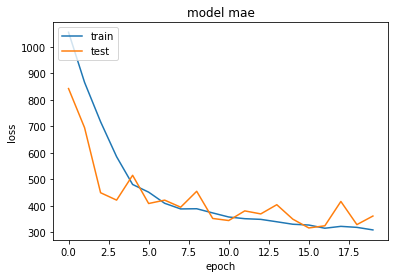

In [16]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.evaluate(test_x5, test_y)

321/321 [==============================] - 1s 2ms/step - loss: 337.6362 - mean_absolute_error: 338.1353


[337.63616943359375, 338.13531494140625]

TUNING THE HP OF THE NEURAL NETWORK!!

In [18]:
# HYPERPARAMETER TUNING

!pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [19]:
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [15]:
# TUNE THE NUMBER OF LAYERS, NEURONS, LEARNING RATE OF THE NEURAL NET

def build_model(hp):
  model = Sequential()

  for i in range(hp.Int('Dense Layers', min_value = 1, max_value = 3)):

    model.add(Dense(
        hp.Int('units', min_value = 128, max_value = 1024, step = 128),
        input_dim = 12,
        kernel_initializer='he_uniform'))
    
    model.add(BatchNormalization())
    model.add(Activation('leaky_relu'))


  model.add(Dense(units = 1, activation = 'leaky_relu', kernel_initializer='he_uniform'))

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('lr', min_value = 1e-4, max_value = 1e-2, sampling = 'log')), 
      loss = 'huber_loss', metrics = ['mean_absolute_error'])

  return model


In [16]:
tuner = kt.RandomSearch(
    build_model,
    kt.Objective('val_loss', direction = 'min'),
    max_trials=30, seed = 69)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [17]:
tuner.search(train_x5, train_y, epochs=5, batch_size = 128, validation_data=(test_x5, test_y))

INFO:tensorflow:Oracle triggered exit


In [18]:
best_model = tuner.get_best_models()[0]

In [19]:
best_model.evaluate(test_x5, test_y)

321/321 [==============================] - 2s 3ms/step - loss: 339.5651 - mean_absolute_error: 340.0641


[339.5650939941406, 340.0641174316406]

In [20]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               2496      
                                                                 
 batch_normalization (BatchN  (None, 192)              768       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 192)               37056     
                                                                 
 batch_normalization_1 (Batc  (None, 192)              768       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 192)               0

In [21]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
Dense Layers: 2
units: 192
lr: 0.007586966748878234
Score: 339.5650329589844
Trial summary
Hyperparameters:
Dense Layers: 2
units: 768
lr: 0.009022079415210089
Score: 340.6034851074219
Trial summary
Hyperparameters:
Dense Layers: 2
units: 640
lr: 0.0064974404904634625
Score: 343.1065368652344
Trial summary
Hyperparameters:
Dense Layers: 2
units: 640
lr: 0.0033137745378583987
Score: 352.28277587890625
Trial summary
Hyperparameters:
Dense Layers: 2
units: 320
lr: 0.0038287047044982298
Score: 385.4798583984375
Trial summary
Hyperparameters:
Dense Layers: 1
units: 1024
lr: 0.008316141310476274
Score: 445.9129333496094
Trial summary
Hyperparameters:
Dense Layers: 1
units: 960
lr: 0.0063112653257792195
Score: 454.6452331542969
Trial summary
Hyperparameters:
Dense Layers: 1
units: 768
lr: 0.0071223894490449685
Score: 456.3585205078125
Trial summary
Hy